In [1]:
"""Show the results of the optimization on the VLSE benchmark."""

# Copyright (c) 2024 Alliance for Sustainable Energy, LLC

# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.

# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.

__authors__ = ["Weslley S. Pereira"]
__contact__ = "weslley.dasilvapereira@nrel.gov"
__maintainer__ = "Weslley S. Pereira"
__email__ = "weslley.dasilvapereira@nrel.gov"
__credits__ = ["Weslley S. Pereira"]
__version__ = "0.5.0"
__deprecated__ = False

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

myRfuncs = (
    "branin",
    "hart3",
    "hart6",
    "shekel",
    "ackley",
    "levy",
    "powell",
    "michal",
    "spheref",
    "rastr",
    "mccorm",
    "bukin6",
    "camel6",
)
algorithms = ("SRS", "DYCORS", "CPTVl")
boundflag = "default"

# myRfuncs = ("mccorm", "bukin6", "camel6")
# algorithms = ("SRS","DYCORS","CPTVl")

myRfuncs = (
    "ackley",
    "bukin6",
    "crossit",
    "drop",
    "egg",
    "griewank",
    "holder",
    "levy",
    "levy13",
    "rastr",
)
algorithms = ("SRS", "DYCORS", "CPTV", "CPTVl")
boundflag = "bounds"

myNargs = {}
maxEvals = {}
nTrials = 0
rtol = 0
optres = {}
exectime = {}

In [3]:
for a in algorithms:
    optres[a] = {}
    exectime[a] = {}
    for rFunc in myRfuncs:
        myNargs[rFunc] = 0
        maxEvals[rFunc] = 0
        optres[a][rFunc] = []
        exectime[a][rFunc] = 0.0
        with open(
            "pickle/" + rFunc + "_" + a + "_" + boundflag + ".pkl", "rb"
        ) as f:
            (
                myNargs[rFunc],
                maxEvals[rFunc],
                nTrials,
                optres[a][rFunc],
                exectime[a][rFunc],
                _,
            ) = pickle.load(f)

In [4]:
# func = "shekel"
# print([optres["CPTVl"][func][i].x for i in range(nTrials)])
# print([optres["CPTVl"][func][i].fx for i in range(nTrials)])

# print([np.minimum.accumulate(optres["CPTVl"][func][i].fsample).tolist() for i in range(nTrials)])
# print(np.array([np.minimum.accumulate(optres["CPTVl"][func][i].fsample).tolist() for i in range(nTrials)]))

Best value for SRS: 7.804123953242627
Best value for DYCORS: 21.58702139403792
Best value for CPTV: 21.057157937563975
Best value for CPTVl: 1.0000000000031755


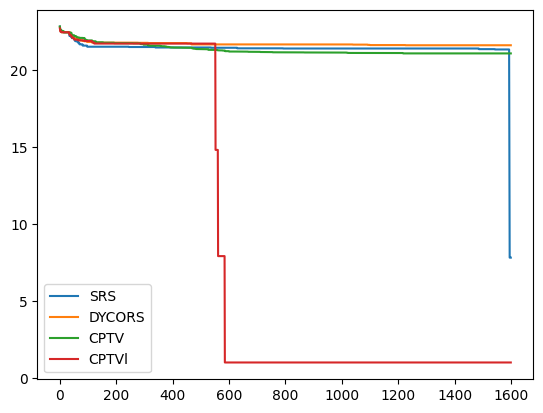

Best value for SRS: 4.934996399813209
Best value for DYCORS: 2.1927487583529985
Best value for CPTV: 2.1587944808648527
Best value for CPTVl: 1.2626840220069349


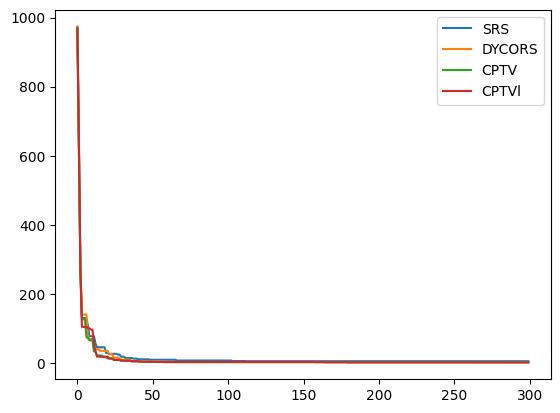

Best value for SRS: 1.0000266035930447
Best value for DYCORS: 1.0001232617369957
Best value for CPTV: 1.0001294472096989
Best value for CPTVl: 1.0002267541780094


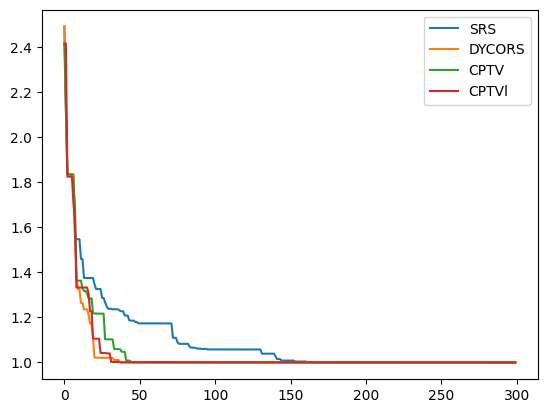

Best value for SRS: 1.33142156799998
Best value for DYCORS: 1.3955114384518683
Best value for CPTV: 1.502254439618793
Best value for CPTVl: 1.5584344813661868


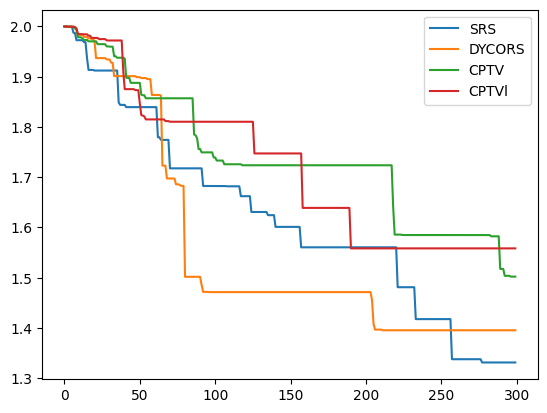

Best value for SRS: 5.17571911381837
Best value for DYCORS: 8.079454982239668
Best value for CPTV: 19.124835529532334
Best value for CPTVl: 92.4995899034878


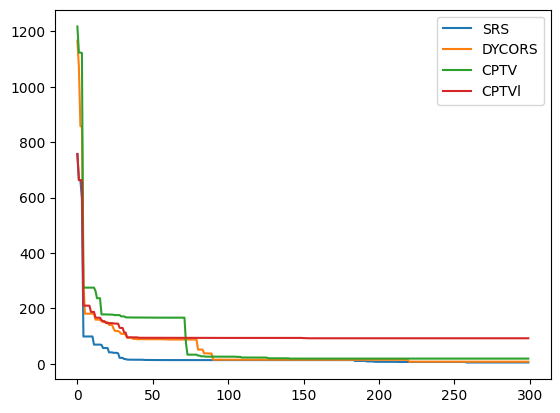

Best value for SRS: 1.0045969827614474
Best value for DYCORS: 1.015694760109535
Best value for CPTV: 1.0056289310203945
Best value for CPTVl: 1.0024795649147002


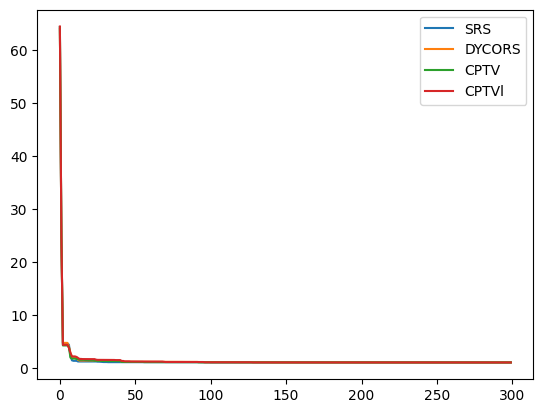

Best value for SRS: 1.0000327164308835
Best value for DYCORS: 1.0002016810780094
Best value for CPTV: 1.0003859960539299
Best value for CPTVl: 0.9999974330853357


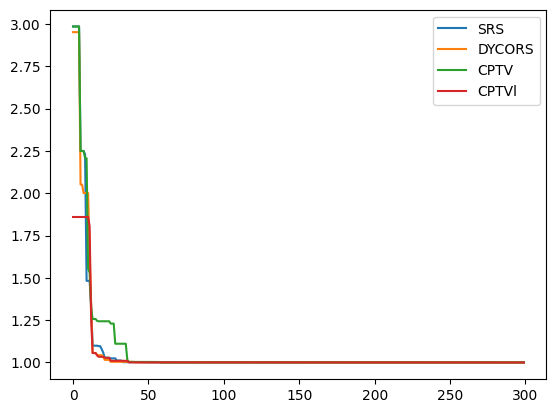

Best value for SRS: 1.000332229530007
Best value for DYCORS: 1.000121444127802
Best value for CPTV: 1.0299211514752553
Best value for CPTVl: 1.0000000009253596


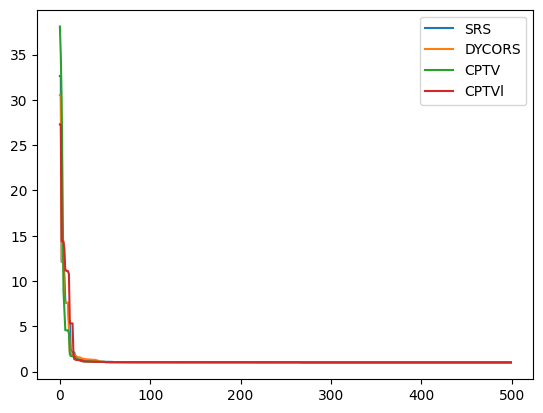

Best value for SRS: 1.000002980986216
Best value for DYCORS: 1.000013425088971
Best value for CPTV: 1.073268079559494
Best value for CPTVl: 1.0366290364772688


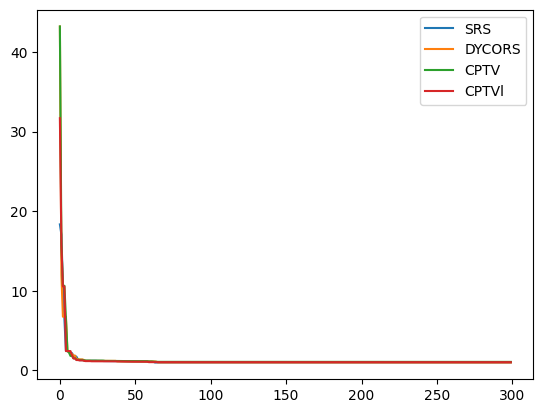

Best value for SRS: 1.689371409452562
Best value for DYCORS: 2.742841111062989
Best value for CPTV: 9.634590032505626
Best value for CPTVl: 1.0


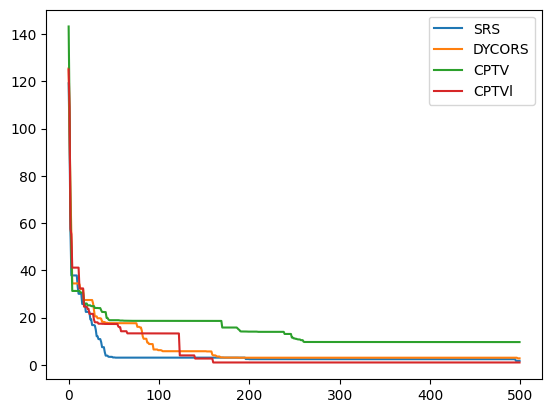

In [5]:
avgBestVals = {}
for a in algorithms:
    avgBestVals[a] = {}
    for rFunc in myRfuncs:
        avgBestVals[a][rFunc] = np.mean(
            np.array(
                [
                    np.minimum.accumulate(
                        optres[a][rFunc][i].fsample
                    ).tolist()
                    for i in range(nTrials)
                ]
            ),
            axis=0,
        )

for rFunc in myRfuncs:
    for a in algorithms:
        print("Best value for " + a + ": " + str(avgBestVals[a][rFunc][-1]))
        plt.plot(avgBestVals[a][rFunc], label=a)
    plt.legend()
    plt.show()

In [6]:
rtau = 1e-2
atau = 1e-3
minVal = 1.0

maxIter = {}
for rFunc in myRfuncs:
    maxIter[rFunc] = 100 * (myNargs[rFunc] + 1)

lpa = {}
for a in algorithms:
    lpa[a] = {}
    for rFunc in myRfuncs:
        count = 0
        while count < len(avgBestVals[a][rFunc]):
            if avgBestVals[a][rFunc][count] - minVal <= rtau * abs(minVal):
                break
            else:
                count += 1
        lpa[a][rFunc] = count + 1

minlpa = {}
for rFunc in myRfuncs:
    minlpa[rFunc] = np.min([lpa[a][rFunc] for a in algorithms])

rpa = {}
for a in algorithms:
    rpa[a] = {}
    for rFunc in myRfuncs:
        if lpa[a][rFunc] <= maxIter[rFunc]:
            rpa[a][rFunc] = lpa[a][rFunc] / minlpa[rFunc]
        else:
            rpa[a][rFunc] = np.inf

nAlpha = 100
alpha = np.linspace(1.0, 4.0, nAlpha)
rho = {}
for a in algorithms:
    rho[a] = np.zeros(nAlpha)
    for k in range(len(alpha)):
        count = 0
        for rFunc in myRfuncs:
            if rpa[a][rFunc] <= alpha[k]:
                count += 1
        rho[a][k] = count / len(myRfuncs)

maxKappa = 100
delta = {}
for a in algorithms:
    delta[a] = np.zeros(maxKappa + 1)
    for k in range(1, maxKappa + 1):
        count = 0
        for rFunc in myRfuncs:
            if lpa[a][rFunc] / (myNargs[rFunc] + 1) <= k:
                count += 1
        delta[a][k] = count / len(myRfuncs)

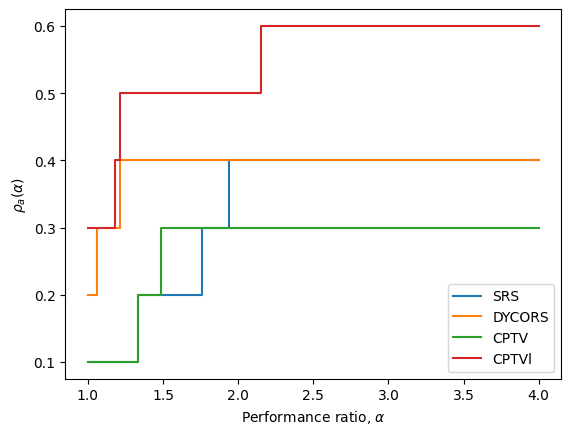

In [7]:
for a in algorithms:
    plt.step(alpha, rho[a], where="post", label=a)
plt.xlabel(r"Performance ratio, $\alpha$")
plt.ylabel(r"$\rho_a(\alpha)$")
plt.legend()
plt.show()

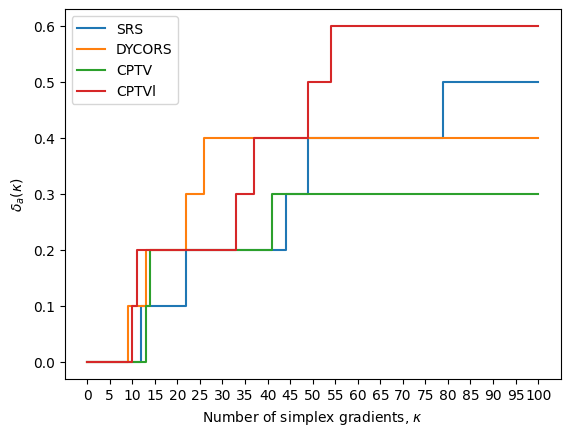

In [8]:
for a in algorithms:
    plt.step(np.arange(0, maxKappa + 1), delta[a], where="post", label=a)
plt.xlabel(r"Number of simplex gradients, $\kappa$")
plt.xticks(range(0, 101, 5))
plt.ylabel(r"$\delta_a(\kappa)$")
plt.legend()
plt.show()

In [9]:
# avgBestVals["SRS"]["ackley"]
lpa["SRS"]["ackley"] / (myNargs["ackley"] + 1)

100.0625